In [1]:
import sys; sys.path.append('/home/grads/g/guangzhou92/fftw-3.3.8/FIt-SNE')
from fast_tsne import fast_tsne

In [19]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import manifold, datasets
from time import time
from matplotlib.ticker import NullFormatter
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

/home/grads/g/guangzhou92/enter/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
ed_data = pd.read_csv('edviz_raw.csv')

In [4]:
y = ed_data[['disposition', 'esi']]
X = ed_data.drop(columns=['disposition', 'esi'])

X_cat = X.select_dtypes(exclude=['int64', 'float64'])
X_dog = X.select_dtypes(include=['int64', 'float64'])


X_cat = pd.get_dummies(X_cat)

X = pd.concat([X_cat, X_dog], axis=1)

X = (X - X.min())/(X.max()-X.min())

X = X.fillna(X.mean())

X_sub = X.sample(100000, random_state = 0)
y_sub = y.sample(100000, random_state = 0)

X_sub.dropna(axis=1, how='all', inplace=True)


In [5]:
y1 = pd.get_dummies(y_sub['disposition']).drop(columns='Discharge')
y2 = y_sub['esi']

In [6]:
n_components=2
perplexities = [5, 30, 50, 100]
early_exaggerations = [1, 12, 20, 50, 100]
learning_rates = [5, 10, 100, 200, 600]
late_exaggerations = [-1, -5, -10, -15, -20]

In [7]:
'''
for perplexity in perplexities:
    for early_exaggeration in early_exaggerations:
        for learning_rate in learning_rates:
            for late_exaggeration in late_exaggerations:
                X_trans = fast_tsne(X_sub, perplexity=perplexity, early_exag_coeff=early_exaggeration, 
                                learning_rate=learning_rate, late_exag_coeff=late_exaggeration, seed=42)
                
                f, ax = plt.subplots(figsize=(8, 8))
                
                
                sns.kdeplot(X_trans[:,0],X_trans[:,1],cmap='Greens', n_levels=50, shade = False, shade_lowest = False)
                f.savefig('./pics/(all)pp=%s,ee=%s,ll=%s,le=%s.png'
                          %(perplexity,early_exaggeration,learning_rate,late_exaggeration), bbox_inches='tight')
                
                
                locs = []
                for i in range(0,2): locs.append(np.where(y1 == i))
                
                f2, ax = plt.subplots(figsize=(8, 8))

                ax = sns.kdeplot(X_trans[locs[0][0],0], X_trans[locs[0][0],1],
                                 n_levels=50, cmap="Blues", shade=False, shade_lowest=False, label='discharged')
                ax = sns.kdeplot(X_trans[locs[1][0],0], X_trans[locs[1][0],1],
                                 n_levels=50, cmap="Reds", shade=False, shade_lowest=False, label='admitted')
                plt.legend()
                plt.show()
                
                f2.savefig('./pics/(separate)pp=%s,ee=%s,ll=%s,le=%s.png'
                           %(perplexity,early_exaggeration,learning_rate,late_exaggeration), bbox_inches='tight')
'''

'\nfor perplexity in perplexities:\n    for early_exaggeration in early_exaggerations:\n        for learning_rate in learning_rates:\n            for late_exaggeration in late_exaggerations:\n                X_trans = fast_tsne(X_sub, perplexity=perplexity, early_exag_coeff=early_exaggeration, \n                                learning_rate=learning_rate, late_exag_coeff=late_exaggeration, seed=42)\n                \n                f, ax = plt.subplots(figsize=(8, 8))\n                \n                \n                sns.kdeplot(X_trans[:,0],X_trans[:,1],cmap=\'Greens\', n_levels=50, shade = False, shade_lowest = False)\n                f.savefig(\'./pics/(all)pp=%s,ee=%s,ll=%s,le=%s.png\'\n                          %(perplexity,early_exaggeration,learning_rate,late_exaggeration), bbox_inches=\'tight\')\n                \n                \n                locs = []\n                for i in range(0,2): locs.append(np.where(y1 == i))\n                \n                f2, ax = plt.s

In [ ]:
X_trans = fast_tsne(X_sub, perplexity=30, early_exag_coeff=1, 
                                learning_rate=5, late_exag_coeff=-15, seed=42)

No handles with labels found to put in legend.


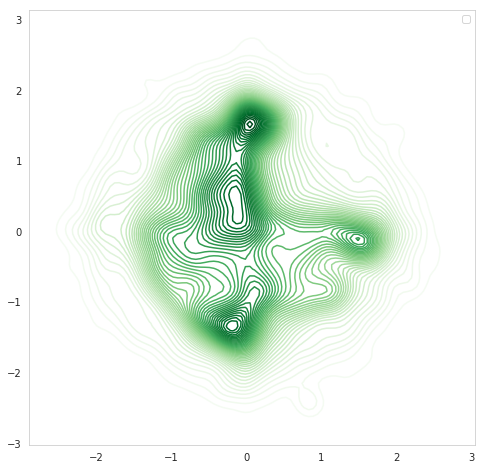

In [20]:
f, ax = plt.subplots(figsize=(8, 8))
sns.kdeplot(X_trans[:,0],X_trans[:,1],cmap='Greens', n_levels=50, shade = False, shade_lowest = False)
locs = []
for i in range(0,2): 
    locs.append(np.where(y1 == i))
    
ax.tick_params(labelsize=15)    
plt.show()


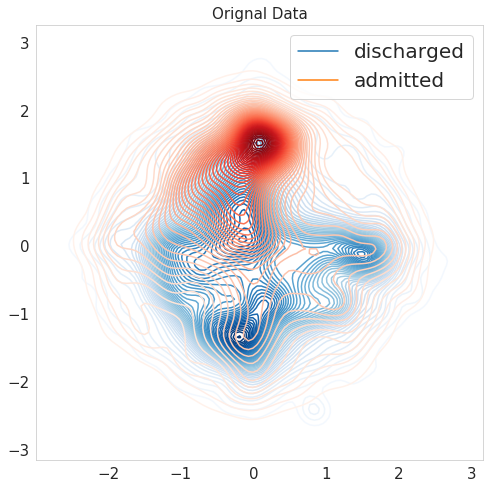

In [32]:
f2, ax = plt.subplots(figsize=(8, 8))

ax = sns.kdeplot(X_trans[locs[0][0],0], X_trans[locs[0][0],1],
                 n_levels=50, cmap="Blues", shade=False, shade_lowest=False, label='discharged')
ax = sns.kdeplot(X_trans[locs[1][0],0], X_trans[locs[1][0],1],
                 n_levels=50, cmap="Reds", shade=False, shade_lowest=False, label='admitted')

ax.set_title("Orignal Data", fontsize=15)
ax.tick_params(labelsize=15)
ax.legend(fontsize=20)

#ax.xaxis.set_major_locator(plt.MaxNLocator(20))
#ax.yaxis.set_major_locator(plt.MaxNLocator(20))

#plt.legend()
#plt.show()


In [9]:
#get peak data to csv

the_peak_center = (0.16, 1.5)
the_radius = 0.2

#the_peak = ed_data.ix[X_sub[ (X_trans[:,0]>0)  & (X_trans[:,0]<0.6) & (X_trans[:,1]>0.2) & (X_trans[:,1]<1.4)].index.values]
the_peak = ed_data.ix[X_sub[((X_trans - the_peak_center)**2).sum(axis=1) < the_radius**2].index.values]
#.to_csv('the_peak.csv')



/home/grads/g/guangzhou92/enter/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [10]:
the_peak[the_peak['disposition'] =='Discharge']
#the_peak[the_peak['esi'] == 1].count()

,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
142139,A,3.0,75.0,Female,Non-Hispanic,White or Caucasian,English,Protestant,Divorced,Retired,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
418944,A,3.0,100.0,Male,Non-Hispanic,White or Caucasian,English,Jewish,Widowed,Retired,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319657,A,NaN,72.0,Female,Non-Hispanic,White or Caucasian,English,Catholic,Married,Retired,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
475595,A,3.0,87.0,Female,Non-Hispanic,White or Caucasian,English,Catholic,Married,Retired,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
521560,B,4.0,48.0,Female,Non-Hispanic,Black or African American,English,Protestant,Single,Not Employed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538618,A,3.0,71.0,Female,Non-Hispanic,White or Caucasian,English,Catholic,Married,Retired,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
387896,B,3.0,90.0,Female,Non-Hispanic,White or Caucasian,English,Catholic,Widowed,Retired,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54592,B,4.0,62.0,Female,Non-Hispanic,White or Caucasian,English,Protestant,Widowed,Part Time,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542397,A,4.0,80.0,Female,Non-Hispanic,White or Caucasian,English,Catholic,Married,Retired,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103835,C,4.0,95.0,Female,Non-Hispanic,White or Caucasian,English,Methodist,Widowed,Retired,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


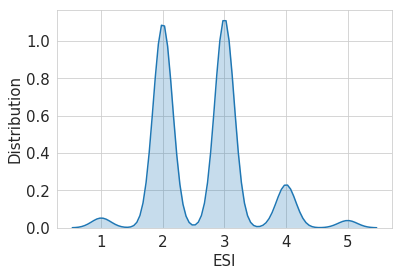

In [30]:
sns.set_style("whitegrid", {'axes.grid' : True})

ax = sns.kdeplot(the_peak['esi'].dropna(), shade=True,legend=False)
ax.set_xlabel('ESI', fontsize=15)
ax.set_ylabel('Distribution', fontsize=15)

ax.tick_params(labelsize=15)
#ax.legend(fontsize=17)